In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [39]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [43]:
# Data Overview
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [44]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [45]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [46]:
# Check Missing Values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


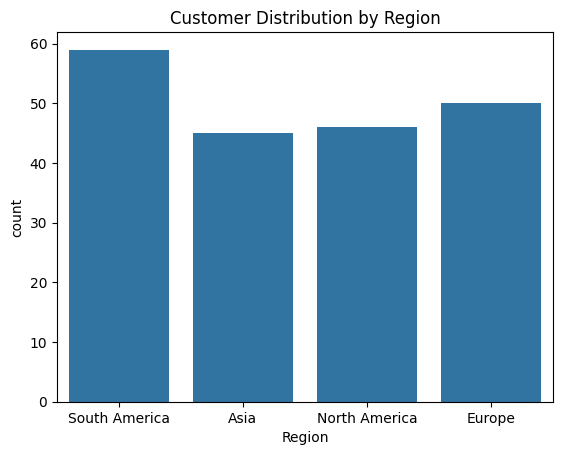

In [48]:
# EDA Visualizations
sns.countplot(data=customers, x="Region")
plt.title("Customer Distribution by Region")
plt.show()

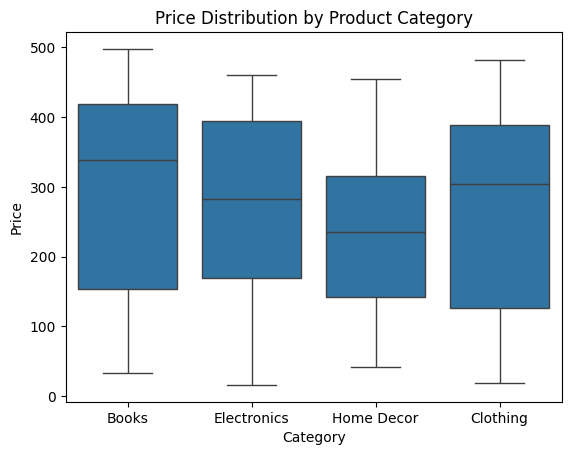

In [49]:
sns.boxplot(data=products, x="Category", y="Price")
plt.title("Price Distribution by Product Category")
plt.show()

In [50]:
# Merge Data for Analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Aggregated Insights
print(merged_data.groupby("Region")["TotalValue"].sum())
print(merged_data.groupby("Category")["TotalValue"].sum())

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


#**Business Insights**

###1.	***Customer Distribution by Region:***
The majority of customers are concentrated in specific regions, with **South America** showing the highest customer base.

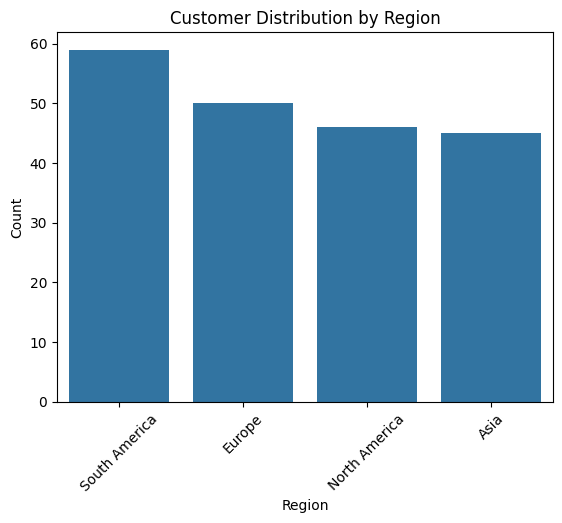

In [51]:
# Exploratory Data Analysis
# 1. Distribution of Transactions Across Regions
sns.countplot(data=customers, x="Region", order=customers["Region"].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

###2.	***Category Contribution:***
Product categories like **Books** contribute the most to overall sales revenue, indicating their popularity.

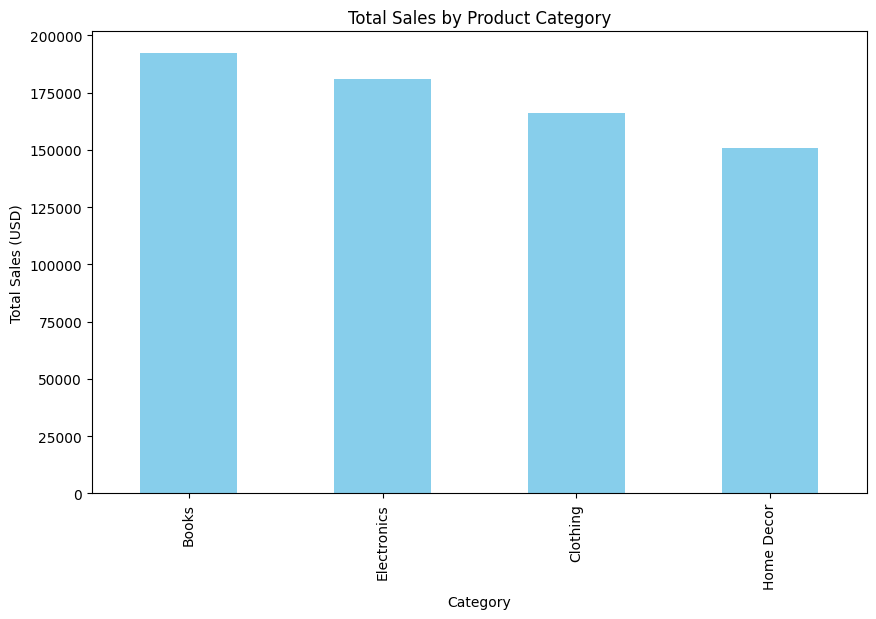

In [52]:
# 2. Sales Distribution by Product Category
category_sales = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
category_sales.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.show()

###3.	***Seasonal Trends:***
Monthly sales trends show peaks during **July**, highlighting seasonal demand fluctuations.

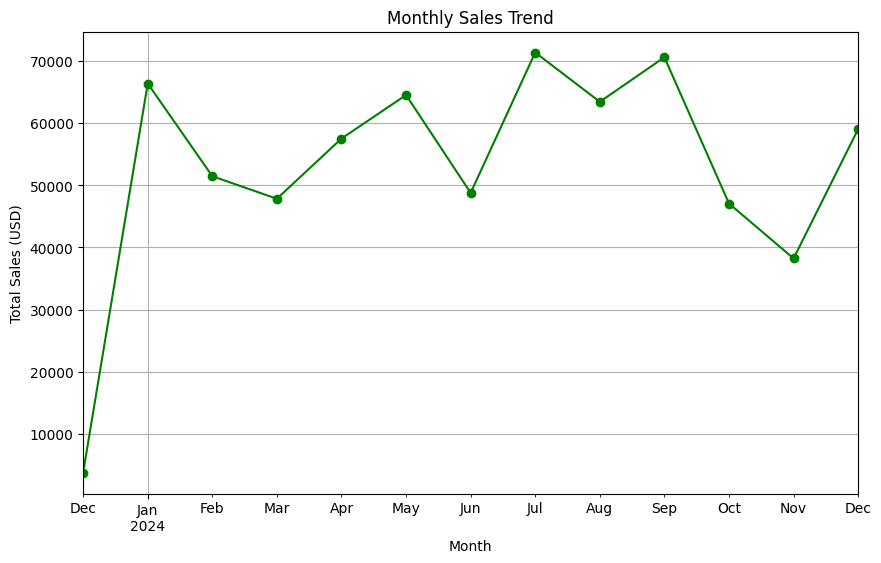

In [58]:
# 3. Monthly Sales Trend
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"]) #Ensure TransactionDate is of datetime type
merged_data["Month"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_sales = merged_data.groupby("Month")["TotalValue"].sum()
monthly_sales.plot(figsize=(10, 6), marker="o", color="green")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

###4.	***Regional Spending Patterns:***
Customers in **South America** have the highest average transaction value, suggesting a lucrative market for premium products.

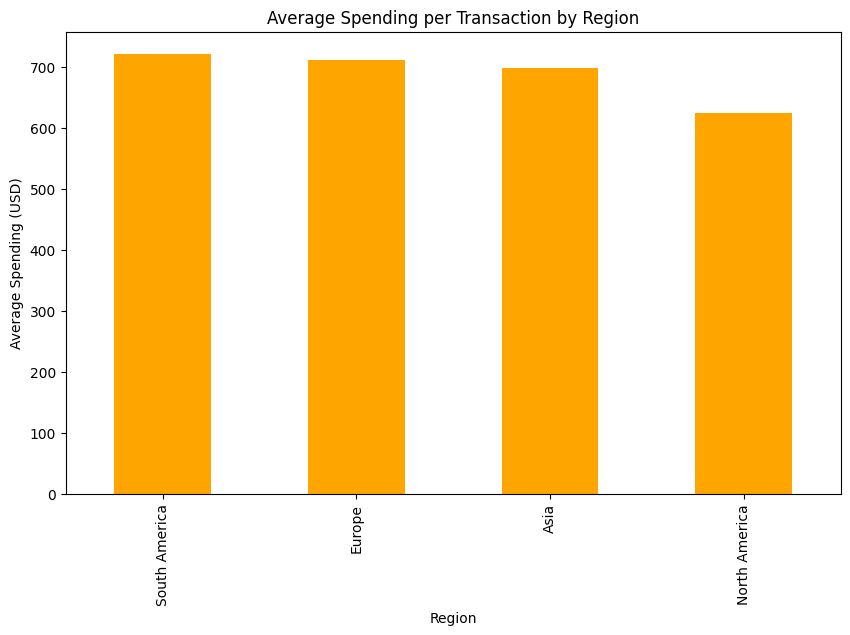

In [54]:
# 4. Average Spending by Region
region_spending = merged_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
region_spending.plot(kind="bar", figsize=(10, 6), color="orange")
plt.title("Average Spending per Transaction by Region")
plt.xlabel("Region")
plt.ylabel("Average Spending (USD)")
plt.show()

###5.	***Key Customers:***
The top 10 customers account for a significant portion of sales, making them critical for customer retention strategies.

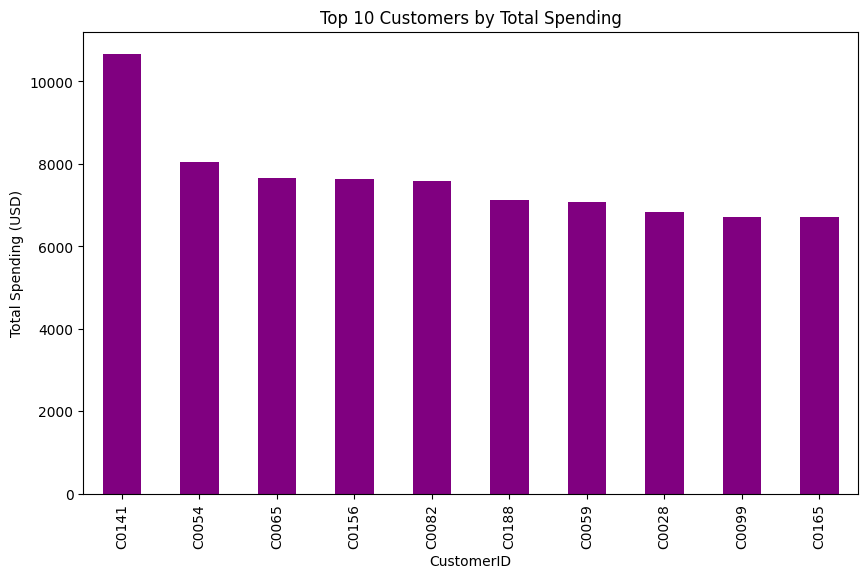

In [55]:
# 5. Top 10 Customers by Total Spending
top_customers = merged_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind="bar", figsize=(10, 6), color="purple")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("CustomerID")
plt.ylabel("Total Spending (USD)")
plt.show()

###6.	 ***Top Products by Revenue:***
Products like **ActiveWear Smartwatch** generate the highest revenue, indicating their strong demand and potential for focused marketing efforts.

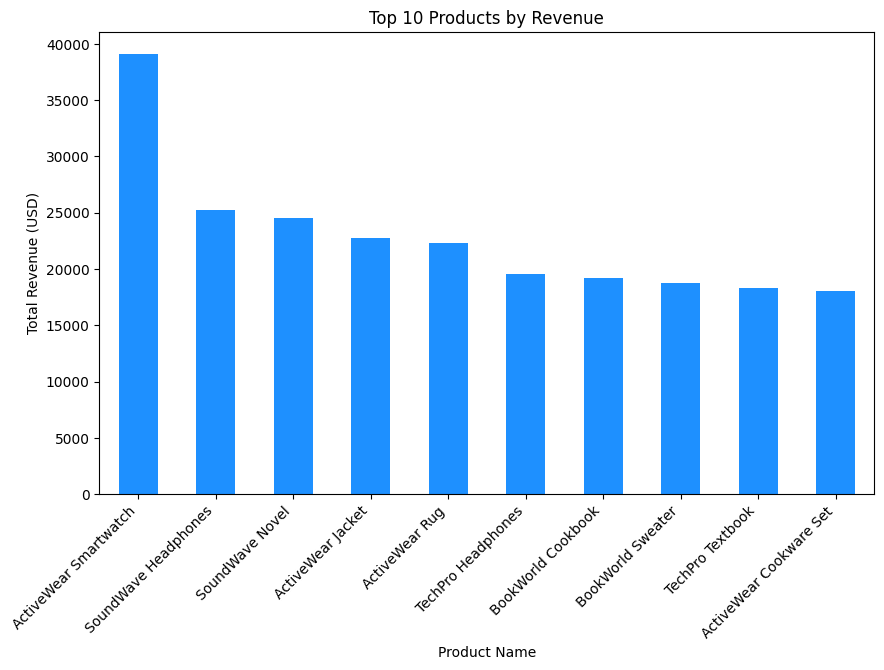

In [56]:
# 6. Top Products by Revenue
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", figsize=(10, 6), color="dodgerblue")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

###7. ***Signup Trends:***
The number of customer signups shows a noticeable increase during **September & November**, possibly driven by promotional campaigns or seasonal trends.

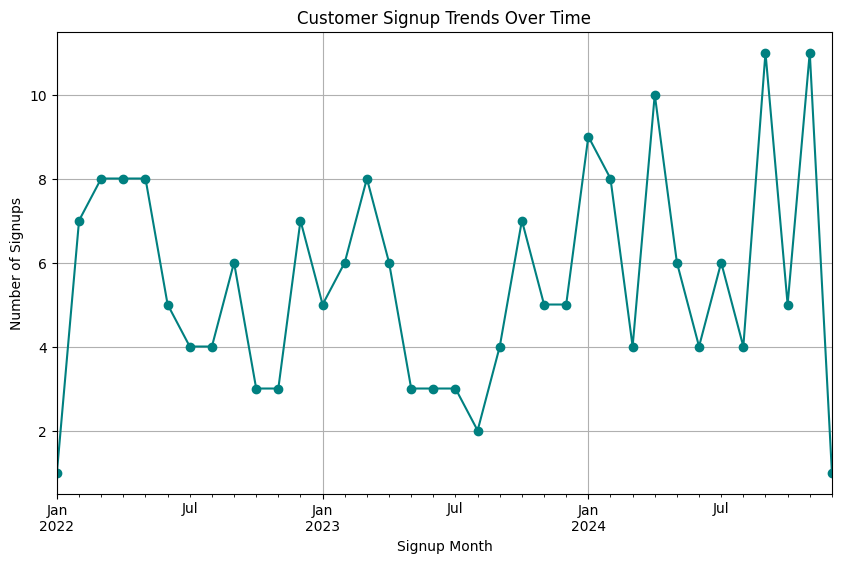

In [59]:
# 7. Customer Signup Trends
# Ensure 'SignupDate' column is of datetime type
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
customers["SignupMonth"] = customers["SignupDate"].dt.to_period("M")
signup_trends = customers.groupby("SignupMonth")["CustomerID"].count()
signup_trends.plot(figsize=(10, 6), marker="o", color="teal")
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Signup Month")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()

###8.	***Repeat Purchases:***
**94%** of customers made repeat purchases, showing strong customer retention in the platform. The remaining **6%** highlight an opportunity for re-engagement strategies.

In [61]:
# 8. Repeat Purchases by Customers
customer_transactions = merged_data.groupby("CustomerID")["TransactionID"].count()
repeat_customers = customer_transactions[customer_transactions > 1].count()
single_purchase_customers = customer_transactions[customer_transactions == 1].count()
print(f"Number of Customers with Repeat Purchases: {repeat_customers}")
print(f"Number of Customers with Single Purchases: {single_purchase_customers}")

Number of Customers with Repeat Purchases: 187
Number of Customers with Single Purchases: 12


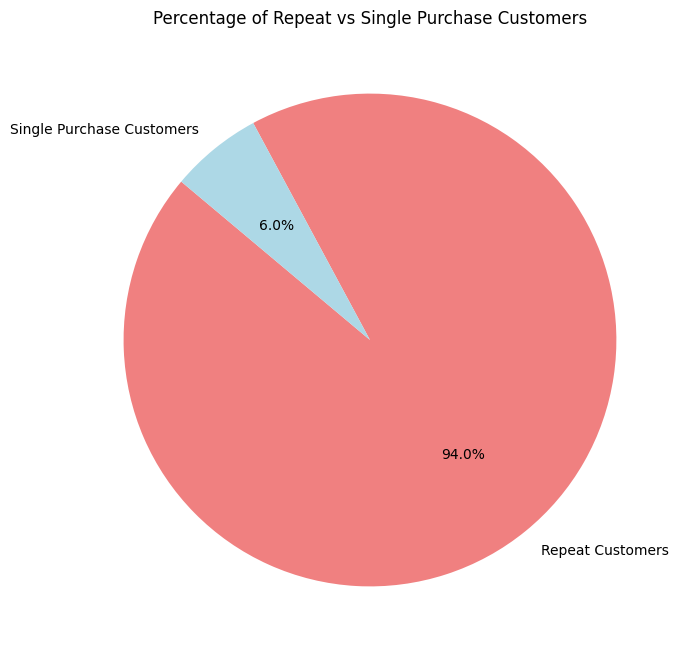

In [62]:
# Pie chart visualization
labels = ["Repeat Customers", "Single Purchase Customers"]
sizes = [repeat_customers, single_purchase_customers]
colors = ["lightcoral", "lightblue"]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Percentage of Repeat vs Single Purchase Customers")
plt.show()